# Housing Price Prediction Data
*Exploratory Data Analysis (EDA)*

Максимум: 2.25т. (6 клетки х 0.375т.)

## Setup

Първо да подсигурим, че имаме библиотеките:

In [70]:
!pip install matplotlib numpy pandas seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


Тук слагайте каквито импорти ще имате:

In [71]:
import pandas as pd
import seaborn as sns

Данните се намират в CSV файл на следния път:

In [72]:
import os

CSV_PATH = os.path.join("data", "housing_price_dataset.csv")

## EDA

1. Заредете набора от данни в `pd.DataFrame` обект и покажете първите няколко реда от него.

In [73]:
df = pd.read_csv(CSV_PATH)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


2. Изведете основни статистики за числовите колони (mean, std, min, max, percentiles).

In [74]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


*Нещо странно дали забелязваме?*

3. Премахнете записите, които имат цена 0 или отрицателно число.

In [75]:
df = df[df['Price'] > 0]
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


4. Направете хистограма на цените на жилищата.

*Hint: за най-лесно ползвайте `.hist()` на `pd.Series`*

*Може да контролирате раздробеността с именования аргумент `bins`*

<Axes: >

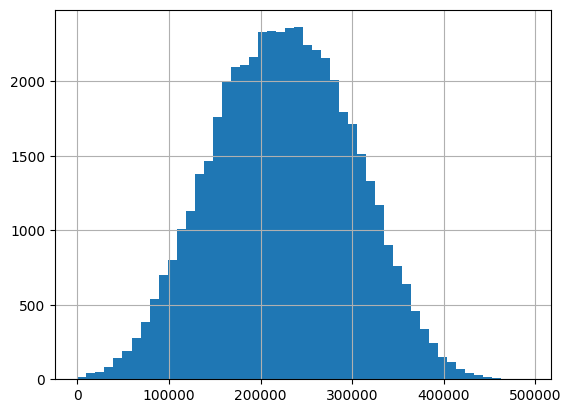

In [76]:
pd.Series(df['Price']).hist(bins=50)

*Какъв забелязваме да е видът на разпределението?*

5. Нека видим колко записа от всяка категория имаме. Направете barplot на броя на жилищата от всяка от трите 'Neighborhood' категории ('Rural', 'Suburb', 'Urban').

*Hint: за най-лесно може да ползвате `sns.countplot`*

In [77]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


<Axes: xlabel='Neighborhood', ylabel='count'>

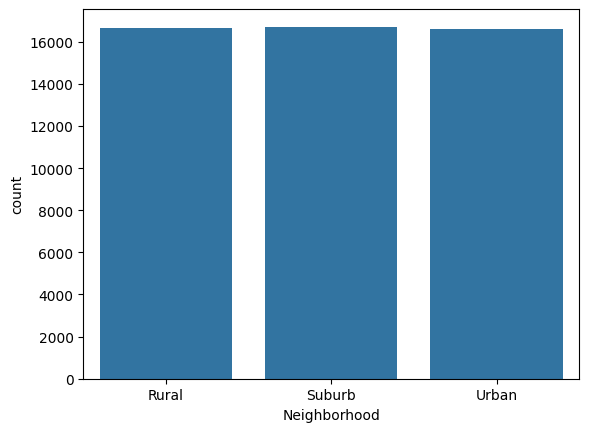

In [78]:
sns.countplot(data=df, x="Neighborhood")

6. Покажете boxplot на дистрибуцията на цените на жилищата във всяка от трите 'Neighborhood' категории.

<Axes: xlabel='Neighborhood', ylabel='Price'>

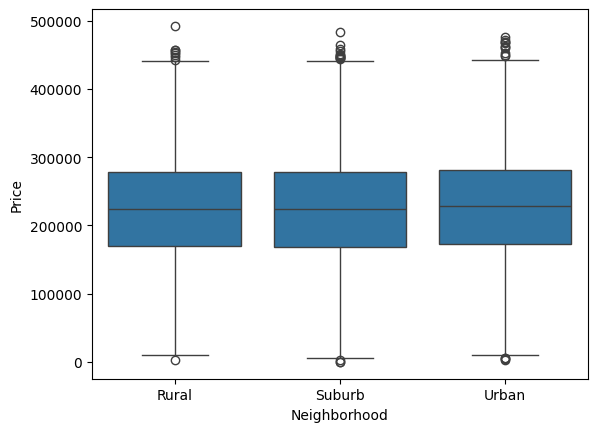

In [79]:
sns.boxplot(data=df, x='Neighborhood', y='Price')

*Има ли значение в коя част на града се намира жилището? Това според вас адекватно ли отразява реалния живот или е възможно данните да са измислени?*